<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/Fehlermargen_in_(Wahl)umfragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Obamas leas is now within the margin of error" - Wahlumfragen und Fehlermargen


Um zu prüfen, ob eine Suppe gut gewürzt ist, löffelt man einen kleinen Teil und verkostet diesen. Die Idee dahinter ist, dass die Kostprobe *repräsentativ* für die gesamte Suppe ist. Jeder Happen sollte wie die gesamte Suppe schmecken, so die Annahme. Man trifft am Kochtopf also einen induktiven Schluss, indem anhand einer Stichprobe auf Eigenschaften der Population geschlossen wird - auch wenn man in diesem Jargon sicher seltener in einer Suppenküche parliert. 
Wahlumfragen sind in diesem Sinne auch eine Suppenverkostung. Wir befragen einen kleinen Teil der Wählerschaft, ziehen also eine Stichprobe, um eine belastbare Ahnung zu bekommen, wie denn die gesamte Wählerschaft bei der nächsten Wahl abstimmen dürfte. 
Aber wie funktioniert das und was muss man bei der Interpretation beachten? Ein Suppenrezept haben wir nicht parat, aber wir können mal nachkochen bzw. simulieren, wie Umfragen funktionieren. Dazu generieren wir uns einen Beispieldatensatz. Wir sagen R, einen Datensatz mit 10000 Befragten zu basteln, die nach einer bestimmten Wahrscheinlichkeit eine bestimmte Parteien wählen. Diese Wahrscheinlichkeit passen wir an aktuelle Umfragen an. 

In [1]:
# Wir basteln uns einen Datensatz der Sonntagsfrage
library(tidyverse)
library(tibble)

set.seed(123) #Der seed sorgt dafür, dass wir trotz zufälliger Erstellung der Stichprobe die gleiche Stichprobe erhalten. 

# Wir erstellen jetzt ein Element mit den Parteinamen und den Prozenten, die sie bei aktuellen Umfragen (von wahlrecht.de) bekommen haben.
parties <- tibble(party = c("CDU", "SPD", "Grüne", "FDP", "LINKE", "AfD", "Sonstige"),
                  percentage = c(0.31, 0.21, 0.16, 0.06, 0.045, 0.15, 0.065))

# Anhand dieser Prozente generieren wir nun eine Stichprobe von 10.000 Befragten. Die Prozente der Parteien werden hier als Wahrscheinlichkeit verwendet. 
# Bedeute, dass eine Person in der Stichprobe eine 31% Wahrscheinlichkeit hat den "Wert" CDU zugeordnet zu bekommen. 
poll <- sample(parties$party, 10000, replace = TRUE, prob = parties$percentage)

# Daraus erstellen wir nun einen Datensatz, welcher für alle "Befragten" eine Zahl sowie ihre "Wahlentscheidung" enthält.
population <- tibble(
  respondent = 1:10000,
  party_preference = poll)

# Schauen wir uns die Daten mal an
head(population)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



respondent,party_preference
<int>,<chr>
1,CDU
2,AfD
3,SPD
4,Sonstige
5,FDP
6,CDU


Wir haben nun für 10000 simulierte Befragte eine Wahlabsicht. Wie würden denn die Stimmenanteile graphisch aussehen? Sind sie in etwas so verteilt wie die angegebenen Prozentzahlen?

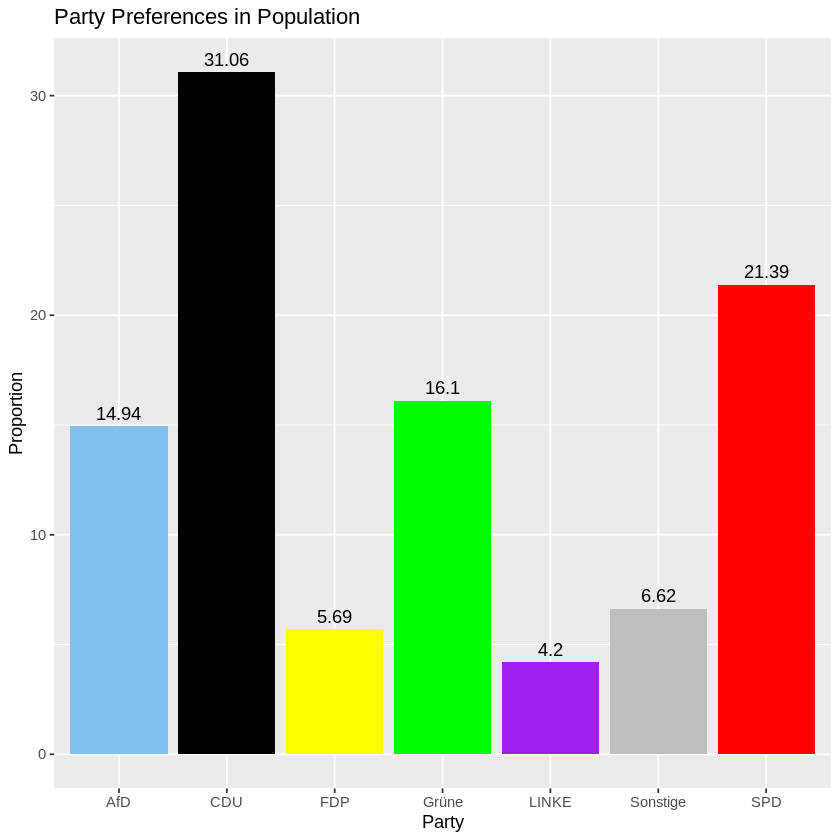

In [2]:
population %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100) %>%
  ggplot(aes(x = party_preference, y = perc)) +
  geom_bar(stat = "identity", fill = c("skyblue2", "black", "yellow", "green", "purple", "red", "grey")) +
  geom_text(aes(label = perc, vjust = -.5)) +
  labs(x = "Party", y = "Proportion", title = "Party Preferences in Population")

Vergleichen wir die Prozentzahlen der Zufallsstichprobe nun mit den angegebenen Prozentwerten, dann stellen wir eine weitestgehende Übereinstummung fest. Diese Stichprobe nehmen wir in unserem Beispiel nun als Grundgesamtheit. 

Nun ziehen wir eine Stichprobe (2%) aus dieser Grundgesamtheit.

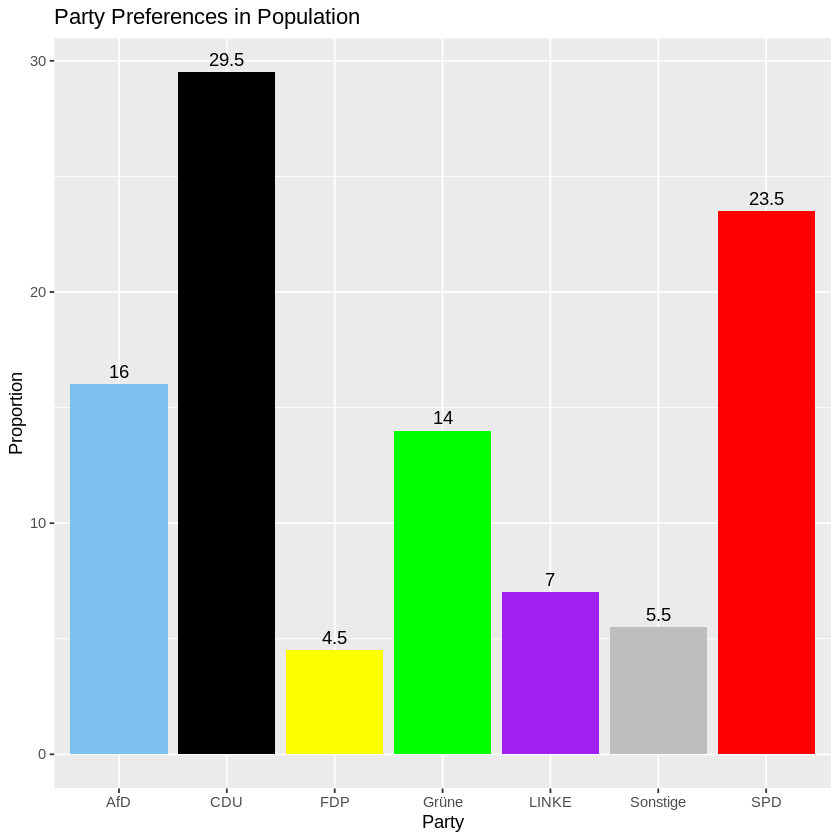

In [3]:
sample <- population %>% 
  sample_frac(.02) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample %>% 
  ggplot(aes(x = party_preference, y = perc)) +
  geom_bar(stat = "identity", fill = c("skyblue2", "black", "yellow", "green", "purple", "red", "grey")) +
  geom_text(aes(label = perc, vjust = -.5)) +
  labs(x = "Party", y = "Proportion", title = "Party Preferences in Population")


Die Werte scheinen leicht von der Grundgesamtheit abzuweichen. Vergleichen wir mal die Werte aus der Grundsgesamtheit und der Stichprobe. Dazu rechnen wir die Differenzen der Prozentwerten aus. 

In [4]:
population2 <- population %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample$perc - population2$perc
mean(abs(sample$perc - population2$perc))

[1]  1.06 -1.56 -1.19 -2.10  2.80  2.11 -1.12

[1] 1.705714

Die obere Reihe zeigt die einzelnen Differenzen zwischen den Prozenten der Grundgesamtheit und der 2% Stichprobe. Bis auf bei en Grünen, haben alle Parteien mindestens einen Prozent unterschied. Der mittelwert der absoluten Differenzen liegt zwischen 1-2%. Woran liegt es, dass diese Stichprobe von der Grundgesamtheit abweicht? Wir ziehen eine Stichprobe aus der Grundgesamtheit und bei 2% von 10.000 Personen ist die Wahrscheinlichkeit durch eine Verzerrung durch extreme Werte recht hoch. Generell gilt, je kleiner die Stichprobe, desto wahrscheinlicher die Abweichung von der Grundgesamtheit (Stichwort "Gesetz der großen Zahlen"). Schauen wir uns das mal an, indem wir Stichrpoben mit verschiedenen größen mit der Grundgesamtheit vergleichen.

In [5]:
sample_small <- population %>% 
  sample_frac(.01) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample_mid <- population %>% 
  sample_frac(.25) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample_big <- population %>% 
  sample_frac(.50) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

mean(abs(sample_small$perc - population2$perc))
mean(abs(sample_mid$perc - population2$perc))
mean(abs(sample_big$perc - population2$perc))

[1] 2.011429

[1] 0.3514286

[1] 0.4257143

Wir sehen, dass die absolute Differenz kleiner wird, je größer die Stichprobe ist. Aber warum liegen umfragen manchmal dennoch falsch, obwohl sie eine ausreichend große und repräsentative Stichprobe besitzen? Dafür zuehen wir aus unserer Grundgesamtheit 100 Stichproben und Vergleichen die relative Häufigkeit der Stimmen für die CDU. Die Stichproben werden dabei mit Zurücklegen. Bedeutet, dass einzelne Beobachtungen mehrfach vorkommen können. So können wir Stichproben ziehen, welche die gleiche größe haben wie die Grundgesamtheit. 

In [6]:
set.seed(123)
n_reps <- 100 # Anzahl der Stichproben
n_obs <- 1000 # Anzahl der Beobachtungen in jeder Stichprobe

many_samples <- tibble() # Für den for-loop brauchen wir zunächst ein leeres Objekt, in dem die Werte später gespeichert werden

for (i in 1:n_reps) {
  sample_data <- population %>% 
    sample_n(n_obs, replace = TRUE) %>% # Wir sagen R nun, dass er 100 mal (i in 1:n_reps) eine Stichprobe mit je 1000 Beobachtungen ziehen soll. Replace steht für das Zurücklegen.
    count(party_preference) %>% # Für jede Partei zählen wir nun die Anzahl der Beobachtungen
    mutate(prop = n / sum(n)) # Und rechnen nun die relative Häufigkeit ihrer stimmen in jeder Stichprobe
  sample_data$rep <- i # Diese Variable gibt an um welche der 100 Stichproben es sich handelt
  many_samples <- rbind(many_samples, sample_data) # Nun fügen wir diese Werte zu einem Datensatz zusammen
}
head(many_samples)

party_preference,n,prop,rep
<chr>,<int>,<dbl>,<int>
AfD,137,0.137,1
CDU,312,0.312,1
FDP,56,0.056,1
Grüne,175,0.175,1
LINKE,41,0.041,1
SPD,229,0.229,1


Nun haben wir 100 verschiedene Prozentwerte aus 100 Stichproben. Nun visualisieren wir beispielhaft die Unterschiede der Prozentwerte der CDU zwischen den Stichproben. Dazu lassen wir uns einen Density-Plot ausgeben, welche zeigt, welche Prozentzahlen am häufigsten vorkommen. 

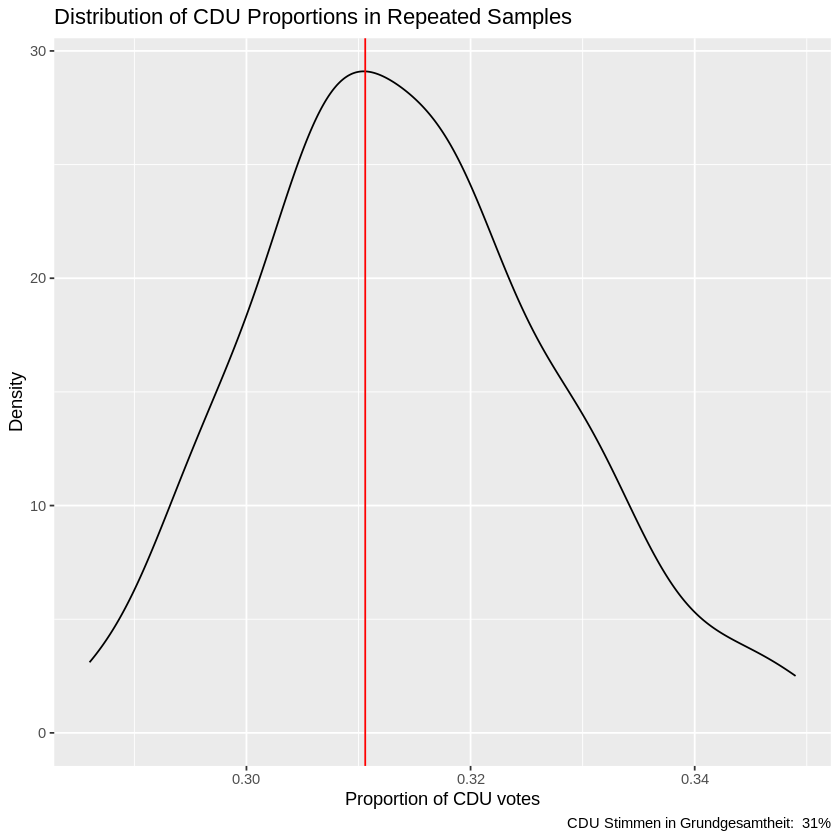

In [7]:
cdu_props <- many_samples %>% 
  filter(party_preference == "CDU") %>% # Wir filtern nur die Beobachtungen für die CDU heraus
  select(rep, prop) # Wir erstellen nun einen Datensatz der nur die Prozentzahl sowie die Nummer zur Identifikation der Stichprobe enthält.

cdu_prop_poll <- population %>% 
  filter(party_preference == "CDU") %>%
  summarize(prop = n() / nrow(population)) # Wir errechnen hier den Mittelwert der CDU aus der Grundgesamtheit

ggplot(cdu_props, aes(x = prop)) +
  geom_density() +
  geom_vline(xintercept =cdu_prop_poll$prop, color = "red") + # Zum Vergleich zeigen wir den Mittelwert der Grundgesamtheit als Strich an
  ylab("Density") +
  xlab("Proportion of CDU votes") +
  ggtitle("Distribution of CDU Proportions in Repeated Samples") +
  labs(caption = paste("CDU Stimmen in Grundgesamtheit: ", scales::percent(cdu_prop_poll$prop)))

In [ ]:
summary(cdu_props$prop)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2860  0.3050  0.3125  0.3143  0.3220  0.3490 

Anhand der Grafik kann man sehr gut die Stichprobenverteilung erkennen. Wir sehen anhand des Mean, dass die Prozentwerte im Durchschnitt bei etwa 31% liegen, wie in der Grundgesamtheit (Stichwort "Zentrals Grenzwerttheorem"). Zusätzlich scheinen die Werte annähernd normalverteilt. Bei eine höheren Anzahl an Stichproben nähert sich die Verteilung noch mehr der NV an. Dafür reicht meist schon eine Stichprobe von n > 30 aus, vorausgesetzt, die Variable ist in der Grundgesamtheit ebenfalls normalverteil. Dies ist eine wichtige Grundannahme, die erfüllt sein muss um präzise Schätzungen zu gewährleisten. Wir sehen aber auch, dass einige Stichprobe deutlich abweichen und von Werten zwischen 28% und knapp 35% alles verteten ist. Hierbei handelt es sich um die Stichprobenfehler, welche auch trotz repräsentativer und ausreichend großer Stichprobe auftreten können. Wir können daher nie 100% sicher sein, dass unsere Stichprobe nicht einer der Stichproben an den Rändern ist.

### Varianz und Standardabweichung
In anbetracht dessen, wie wahrscheinlich ist es denn nun, dass meine Stichprobe den wahren Wert der Grundgesamtheit trifft? Diese Aussage in etwas machen zu können ist der Kern der Inferenzstatistik. 
Dazu braucht es die Varianz, bzw. die Standardabweichung (SD), welche die Wurzel der Varianz ist. Die Standardabweichung zeigt uns die durchschnittliche Abweichung vom Mittelwert. Im Falle der Inferenzstatistik nennt man das auch den Standardfehler. Dazu muss die Stichprobenverteilung jedoch normalverteilt sein! Dann gilt grundsätzlich, dass das 95%-Konfidenzintervall im Bereich

**-2\*sd < x < 2\*sd**

liegt, wobei x hier für den geschätzen Mittelwert steht. Diese Konfidenzintervall (KI) ist die theoretische Annahme, dass beim Ziehen einer ausreichend großen Anzahl an Stichproben in etwa 95% der Stichproben den wahren Wert der Grundgesamtheit beinhalten. Liegt unser geschätzer Mittelwert also innerhalb dieses Intervalls, dann besteht eine gute Wahrscheinlichkeit, dass er dem wahren Mittelwert recht nah ist. Was ist das Problem daran? Das KI bildet sich aus dem Mittelwert und dem Standardfehler der Grundgesamtheit. Dieser bildet sich wie folgt:
\begin{align}
SE = \frac{s}{\sqrt{n}}
\end{align}
Das s steht hierbei für die Standardabweichung des Mittelwerts (hier jedoch schwierig, das wir eine kategoriale Variable "Parteiwahl" haben und eher für nummerische Variablen geeignet) und n entsprechend für die Anzahl der Personen. 
Der Parameter s liegt uns aber für gewöhnlich nicht vor, weshalb diese Werte der Stichprobe entnommen werden und als Schätzer dieser Parameter gelten.
\begin{align}
SE = \frac{s_s}{\sqrt{n_s}}
\end{align}
Hier gilt wieder, je größer die Stichprobe, desto kleiner der Standardfehler und desto genauer entsprechend die Schätzung. Gleichzeitig wird die Varianz in der Stichprobe natürlich auch größer, wenn die Werte in der Grundgesamtheit generell stark variiren. 